## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Запрос к базе данных

In [4]:
commits_query = 'SELECT timestamp, uid FROM checker WHERE uid LIKE "user_%"'
commits_count = pd.read_sql(commits_query, connection)
commits_count

,timestamp,uid
0,2020-04-17 05:19:02.744528,user_4
1,2020-04-17 05:22:35.249331,user_4
2,2020-04-17 05:22:45.549397,user_4
3,2020-04-17 05:34:14.691200,user_4
4,2020-04-17 05:34:24.422370,user_4
...,...,...
3202,2020-05-21 20:19:06.872761,user_1
3203,2020-05-21 20:22:41.785725,user_1
3204,2020-05-21 20:22:41.877806,user_1
3205,2020-05-21 20:37:00.129678,user_1


## Датафрейм по будням

In [5]:
def weekday_func(x):
    result = ''
    if x == 0:
        result = 'Mon'
    elif x == 1:
        result = 'Tue'
    elif x == 2:
        result = 'Wed'
    elif x == 3:
        result = 'Thu'
    elif x == 4:
        result = 'Fri'
    elif x == 5:
        result = 'Sat'
    elif x == 6:
        result = 'Sun'   
    return result

In [6]:
budni_df = commits_count.copy()
budni_df['timestamp'] = pd.to_datetime(budni_df['timestamp'])
budni_df['day_of_week'] = budni_df['timestamp'].dt.weekday
budni_df['weekday'] = budni_df['day_of_week'].apply(weekday_func)
del budni_df['day_of_week']
budni_df = budni_df.groupby(['uid', 'weekday']).count().reset_index()
budni_df

,uid,weekday,timestamp
0,user_0,Mon,3
1,user_1,Sat,1
2,user_1,Sun,43
3,user_1,Thu,39
4,user_1,Wed,1
...,...,...,...
133,user_7,Tue,5
134,user_7,Wed,3
135,user_8,Sat,46
136,user_8,Sun,26


## Датафрейм по часам

In [7]:
hours_df = commits_count.copy()
hours_df['timestamp'] = pd.to_datetime(hours_df['timestamp'])
hours_df['hour'] = hours_df['timestamp'].dt.hour
hours_df = hours_df.groupby(['uid', 'hour']).count().reset_index()
hours_df

,uid,hour,timestamp
0,user_0,17,3
1,user_1,12,1
2,user_1,16,1
3,user_1,17,8
4,user_1,19,21
...,...,...,...
303,user_8,16,14
304,user_8,17,7
305,user_8,19,7
306,user_8,20,1


## Подготовка данных для графика

In [8]:
pivot_table_budni = budni_df.pivot_table(index='weekday', columns='uid', values='timestamp', aggfunc='sum', fill_value=0)
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_table_budni = pivot_table_budni.reindex(weekday_order)
user_totals = pivot_table_budni.sum(axis=0)
sorted_users = user_totals.sort_values(ascending=False).index
pivot_table_budni = pivot_table_budni[sorted_users]
pivot_table_budni

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Sat,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Sun,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0


In [9]:
pivot_table_hours = hours_df.pivot_table(index='hour', columns='uid', values='timestamp', aggfunc='sum', fill_value=0)
user_totals_hrs = pivot_table_hours.sum(axis=0)
sorted_users_hrs = user_totals_hrs.sort_values(ascending=False).index
pivot_table_hours = pivot_table_hours[sorted_users_hrs]
pivot_table_hours

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,1,0,0,1,0
9,0,4,13,0,0,3,0,1,0,3,...,0,0,0,2,0,0,3,0,0,0
10,26,2,42,18,20,16,0,0,0,2,...,7,0,0,0,0,0,0,0,0,0


## График

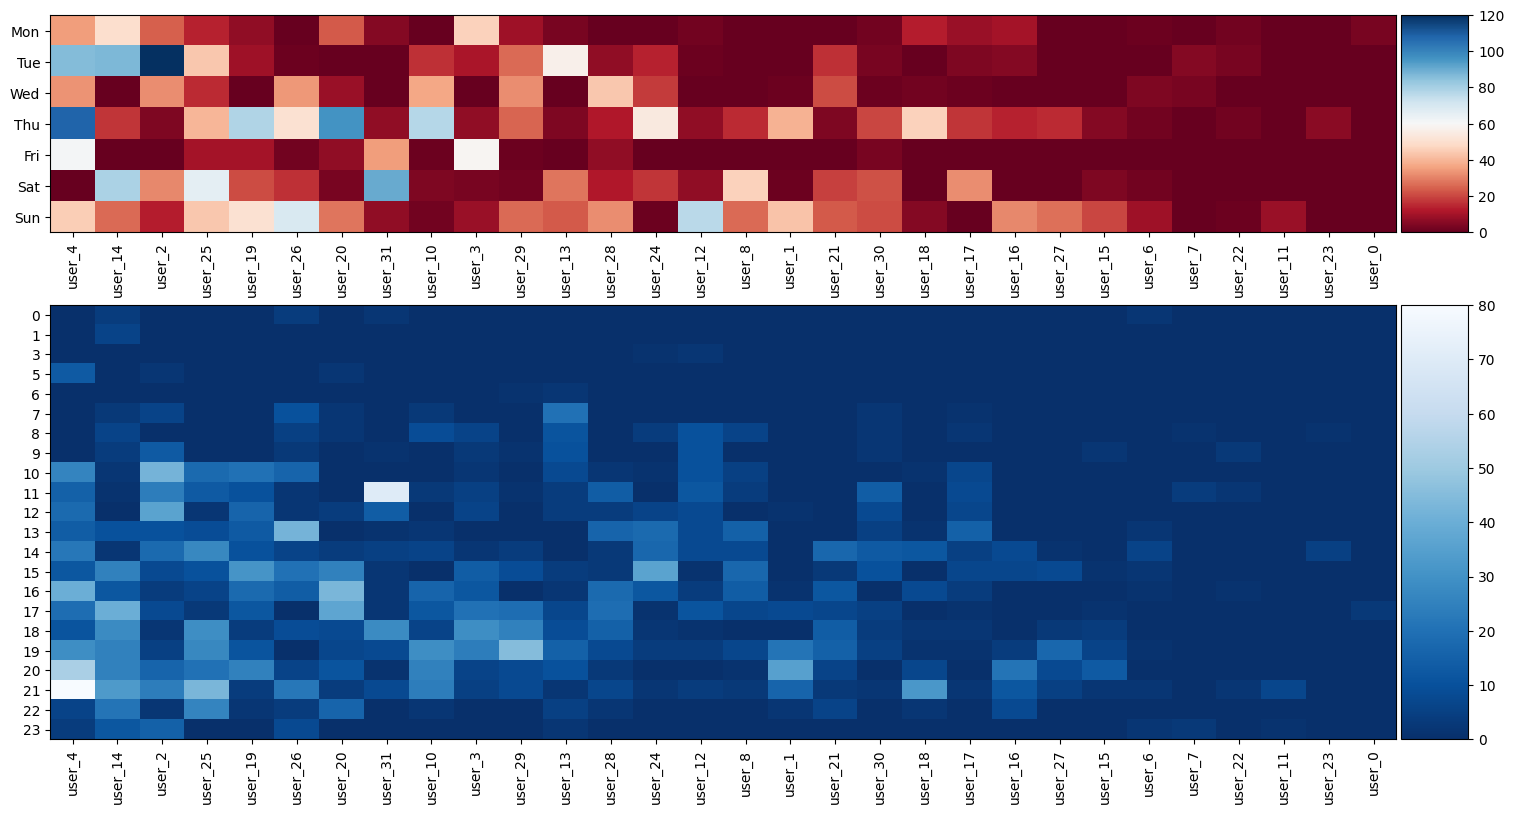

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [1, 2]})

im1 = ax1.imshow(pivot_table_budni, cmap='RdBu', interpolation='nearest', aspect='auto', vmin=0, vmax=120)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax1)

ax1.set_xticks(range(len(pivot_table_budni.columns)))
ax1.set_yticks(range(len(pivot_table_budni.index)))
ax1.set_xticklabels(pivot_table_budni.columns, rotation=90)
ax1.set_yticklabels(pivot_table_budni.index)

im2 = ax2.imshow(pivot_table_hours, cmap='Blues_r', interpolation='nearest', aspect='auto', vmin=0, vmax=80)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax2)

ax2.set_xticks(range(len(pivot_table_hours.columns)))
ax2.set_yticks(range(len(pivot_table_hours.index)))
ax2.set_xticklabels(pivot_table_hours.columns, rotation=90)
ax2.set_yticklabels(pivot_table_hours.index)

plt.tight_layout(pad=0.2)

## Закрытие соединения с БД

In [11]:
connection.close()

## У какого пользователя больше всего коммитов во Вт?

### Ответ: user_2

## Какой пользователь имеет больше всего коммитов в Чт?

### Ответ: user_4

## В какой будний день пользователи не любят делать много коммитов?

### Ответ: пт

## Какой пользователь в какой час сделал наибольшее количество коммитов?

### Ответ: user_4, 21